# MNIST Handwritten Digit Classification

In [1]:
# Load Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist

### 1. Loading the data

In [2]:
# Import the dataset first using keras library
# Dataset contains images for handwritten numbers for digits 0 to 9 and labels (2 columns )
# All images are 28x28

mnist = tf.keras.datasets.mnist

In [3]:
# Classify mnist data to training and testing, X and y
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 2. Exploring the data

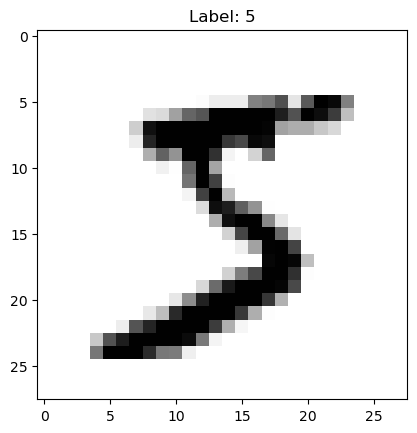

In [4]:
# Visualize a sample image from the training set
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title(f"Label: {y_train[0]}")
plt.show()

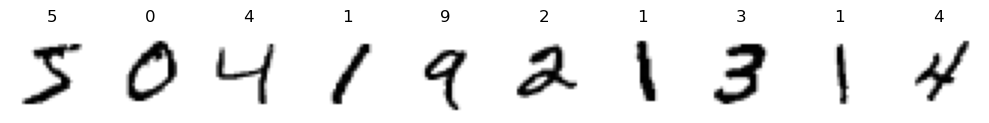

In [5]:
# Visualize the first 10 images from the training set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(y_train[i])
plt.tight_layout()
plt.show()

### 3. Processing the data

In [6]:
# Normalize the data to scale pixel values between 0 and 1 to be able to feed it into the NN model
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### 4. Modeling

In [7]:
# Build the neural network model layer by layer in a sequential way

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Explicit input layer
    tf.keras.layers.Flatten(),             # Flatten input images
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(128, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

In [8]:
# Compile the model
nn_model.compile(
    optimizer='adam', # to update the model weight during the training (adam algorithm)
    loss='sparse_categorical_crossentropy', # degree of error
    metrics=['accuracy'] # how well the model is performing
)

In [9]:
# Train the model
# X_Train - rules needed to train the model
# y_train - decisons needed to train the model
# epochs = 5 - number of training laps
nn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8678 - loss: 0.4603
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9658 - loss: 0.1134
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9774 - loss: 0.0731
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0513
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0389


### 5. Evaluation

In [18]:
# Evaluate the model
val_loss, val_acc = nn_model.evaluate(X_test, y_test)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1020
Validation Loss: 0.0897, Validation Accuracy: 0.9744


### 6. Prediction

In [19]:
# Make predictions
predictions = nn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


First Prediction - Predicted Label: 6, True Label: 6


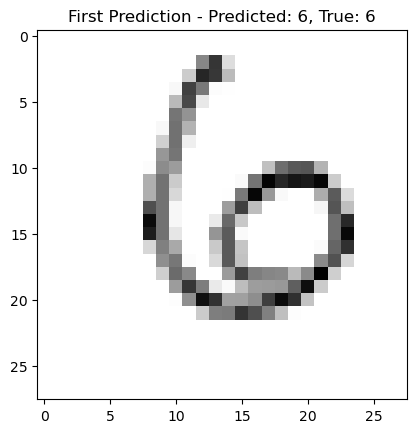

In [21]:
# Visualize a first prediction
sample_index_1 = 100
predicted_label_1 = np.argmax(predictions[sample_index_1])
true_label_1 = y_test[sample_index_1]
print(f"First Prediction - Predicted Label: {predicted_label_1}, True Label: {true_label_1}")

plt.imshow(X_test[sample_index_1], cmap=plt.cm.binary)
plt.title(f"First Prediction - Predicted: {predicted_label_1}, True: {true_label_1}")
plt.show()

Second Prediction - Predicted Label: 3, True Label: 3


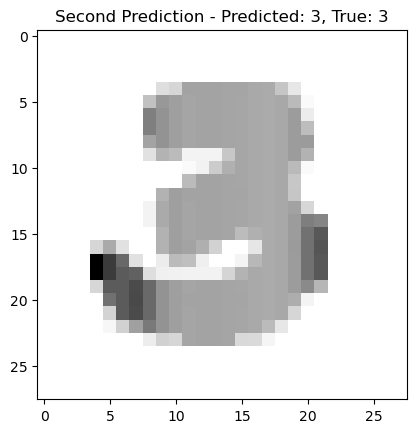

In [22]:
# Visualize a second prediction
sample_index_2 = 200
predicted_label_2 = np.argmax(predictions[sample_index_2])
true_label_2 = y_test[sample_index_2]
print(f"Second Prediction - Predicted Label: {predicted_label_2}, True Label: {true_label_2}")

plt.imshow(X_test[sample_index_2], cmap=plt.cm.binary)
plt.title(f"Second Prediction - Predicted: {predicted_label_2}, True: {true_label_2}")
plt.show()

### Saving the Model for later use

In [12]:
# Save the trained model for later use
nn_model.save('mnist_nn_model.h5')
print("Model saved as 'mnist_nn_model.h5'")

Model saved as 'mnist_nn_model.h5'


### End